In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [23]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Exploratory data analysis

<Axes: xlabel='Attrition', ylabel='count'>

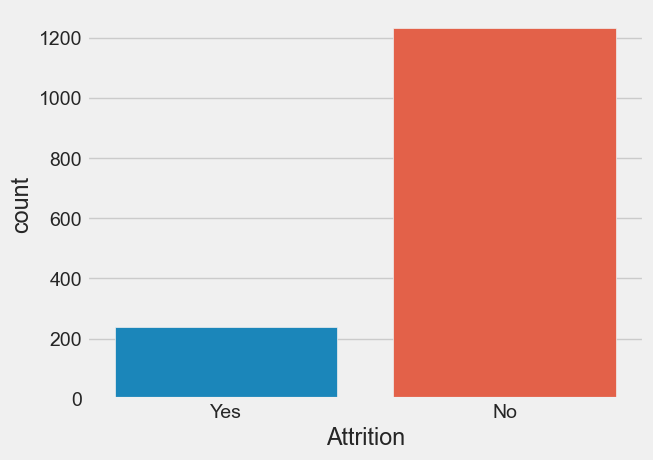

In [24]:
sns.countplot(x='Attrition',data=df)

In [25]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'OverTime', 'StandardHours'],axis='columns',inplace=True)

categorical_col=[]
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique())<=50:
        categorical_col.append(column)
df['Attrition']= df.Attrition.astype('category').cat.codes
categorical_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18']

In [26]:
df.dtypes

Age                          int64
Attrition                     int8
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [27]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [28]:
categorical_col.remove('Attrition')

In [29]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for column in categorical_col:
    df[column]  = label.fit_transform(df[column])

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition',axis=1)
y= df.Attrition
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

# Apply tree and Random Forest Algorithms

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf,X_train,y_train,X_test,y_test,train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train,pred,output_dict=True))
        print('Train Result:\n====================================')
        print(f'Accuracy Score:{accuracy_score(y_train,pred)*100:.2f}%')
        print('--------------------------------')
        print(f'Classification Report:\n{clf_report}')
        print('------------------')
        print(f'Confusion Matrix:\n{confusion_matrix(y_train,pred)}\n')
    elif train==False:
        pred  = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test,pred,output_dict=True))
        print('Test result')
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

        
        

# Decision Tree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train,y_train)
print_score(tree_clf,X_train,y_train,X_test,y_test,train=True)
print_score(tree_clf,X_train,y_train,X_test,y_test,train=False)

Train Result:
Accuracy Score:100.00%
--------------------------------
Classification Report:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    817.0  167.0       1.0      984.0         984.0
------------------
Confusion Matrix:
[[817   0]
 [  0 167]]

Test result
Accuracy Score: 77.37%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.884422   0.272727  0.773663    0.578575      0.796318
recall       0.846154   0.342857  0.773663    0.594505      0.773663
f1-score     0.864865   0.303797  0.773663    0.584331      0.784053
support    416.000000  70.000000  0.773663  486.000000    486.000000
_______________________________________________
Confusion Matrix: 
 [[352  64]
 [ 46  24]]



# DecisionTree Classifier Hyperparameter tuning 

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params={
    'criterion':('gini','entropy'),
    'splitter': ('best','random'),
    'max_depth':(list(range(1,20))),
    'min_samples_split':[2,3,4],
    'min_samples_leaf':list(range(1,20))
}
tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf,params,scoring='f1',n_jobs=-1,verbose=1,cv=5)

tree_cv.fit(X_train,y_train)
best_params = tree_cv.best_params_
best_params


Fitting 5 folds for each of 4332 candidates, totalling 21660 fits


{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'random'}

In [40]:
tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train,y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score:92.07%
--------------------------------
Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.932164    0.844961  0.920732    0.888562      0.917364
recall       0.975520    0.652695  0.920732    0.814107      0.920732
f1-score     0.953349    0.736486  0.920732    0.844918      0.916544
support    817.000000  167.000000  0.920732  984.000000    984.000000
------------------
Confusion Matrix:
[[797  20]
 [ 58 109]]

Test result
Accuracy Score: 78.40%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.869359   0.230769  0.783951    0.550064      0.777381
recall       0.879808   0.214286  0.783951    0.547047      0.783951
f1-score     0.874552   0.222222  0.783951    0.548387      0.780595
support    416.000000  70.000000  0.783951  486.000000    486.000000
______________________________________________

# Visualization of a Tree

In [41]:
from IPython.display import Image
from six import StrigIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns)
features.remove('Attrition')

ImportError: cannot import name 'StrigIO' from 'six' (C:\Users\Aditya\anaconda3\Lib\site-packages\six.py)